## 1. Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error

## 2. Load Dataset

In [2]:
df = pd.read_csv("data/data.csv")

In [3]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


## 3. Data Insertion

In [4]:
df.shape

(892, 6)

In [ ]:
import pandas as pd
df = pd.read_csv("data/Cleaned_data.csv")

df = df[['name','company','year','Price','kms_driven','fuel_type']]

Index(['Unnamed: 0', 'name', 'company', 'year', 'Price', 'kms_driven',
       'fuel_type'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    int64 
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int64(1), object(5)
memory usage: 41.9+ KB


In [6]:
df.nunique()

name          525
company        48
year           24
Price         274
kms_driven    258
fuel_type       3
dtype: int64

In [7]:
df.isna().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(94)

## 4. Data Preprocessing

In [9]:
df[df['Price'] == 'Ask For Price']

,name,company,year,Price,kms_driven,fuel_type
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
5,Ford EcoSport Titanium 1.5L TDCi,Ford,2015,Ask For Price,"59,000 kms",Diesel
69,I want to sell my car Tata Zest,I,2017,Ask For Price,NaN,NaN
85,I want to sell my car Tata Zest,I,2017,Ask For Price,NaN,NaN
138,Maruti Suzuki Alto 800 Lxi,Maruti,2018,Ask For Price,"28,028 kms",Petrol
185,"Commercial , DZire LDI, 2016, for sale",Commercial,0,Ask For Price,NaN,NaN
286,"Commercial , DZire LDI, 2016, for sale",Commercial,0,Ask For Price,NaN,NaN
295,Maruti Suzuki Swift LDi,Maruti,2010,Ask For Price,"52,000 kms",Diesel
304,Tata Indica eV2 LS,Tata,2017,Ask For Price,"84,000 kms",Diesel
360,selling car Ta,selling,0,Ask For Price,NaN,NaN


In [10]:
df = df[df['Price'] != "Ask For Price"]

In [11]:
df.isna().sum()

name           0
company        0
year           0
Price          0
kms_driven    38
fuel_type     41
dtype: int64

In [12]:
df[df['year'] == '2015']

,name,company,year,Price,kms_driven,fuel_type


In [13]:
df['year'].value_counts()

year
2015    111
2014     94
2013     94
2012     75
2016     74
2011     59
2009     55
2017     53
2010     43
0        36
2018     30
2006     22
2007     19
2019     18
2008     16
2005     13
2003     13
2004     12
2000      7
2001      5
2002      4
1995      2
150       1
2         1
Name: count, dtype: int64

In [14]:
df["year"] = pd.to_numeric(df["year"], errors="coerce")   # convert, invalid → NaN
df = df.dropna(subset=["year"])                           # remove NaN rows
df["year"] = df["year"].astype(int)    

In [15]:
df['kms_driven'].str.strip().str.split(" ")

0      [45,000, kms]
1          [40, kms]
3      [28,000, kms]
4      [36,000, kms]
6      [41,000, kms]
           ...      
887              NaN
888    [27,000, kms]
889    [40,000, kms]
890         [Petrol]
891         [Petrol]
Name: kms_driven, Length: 857, dtype: object

In [16]:
df["kms_driven"] = (
    df["kms_driven"]
    .astype(str)                         # ensure string
    .str.extract(r"([\d,]+)")[0]         # extract number, take first column
    .str.replace(",", "", regex=False)   # remove commas
    .astype(float)                       # convert to float
)

In [17]:
df['kms_driven'].value_counts()

kms_driven
45000.0     30
35000.0     29
55000.0     25
50000.0     23
20000.0     21
            ..
111111.0     1
30874.0      1
25500.0      1
44005.0      1
132000.0     1
Name: count, Length: 247, dtype: int64

In [18]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000",45000.0,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40.0,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000",28000.0,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000",36000.0,Diesel
6,Ford Figo,Ford,2012,"1,75,000",41000.0,Diesel


In [19]:
df['Price'] = df['Price'].str.replace(",","").astype(float)

In [20]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000.0,45000.0,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000.0,40.0,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000.0,28000.0,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000.0,36000.0,Diesel
6,Ford Figo,Ford,2012,175000.0,41000.0,Diesel


In [21]:
df['fuel_type'].value_counts()

fuel_type
Petrol    428
Diesel    386
LPG         2
Name: count, dtype: int64

In [22]:
df = df[df['fuel_type'] != 'LPG']

In [23]:
df['company'].value_counts()

company
Maruti        225
Hyundai       139
Mahindra       99
Tata           70
Honda          61
Toyota         37
Chevrolet      35
Renault        33
Ford           30
Volkswagen     19
Skoda          13
Audi           11
Mini            8
BMW             8
Datsun          7
Nissan          6
Mitsubishi      6
Mercedes        6
Fiat            4
Force           4
Commercial      3
Hindustan       3
MARUTI          2
Used            2
Jaguar          2
urgent          2
tata            2
Any             1
TATA            1
sell            1
i               1
scratch         1
all             1
Well            1
2012            1
Land            1
I               1
Volvo           1
very            1
Sale            1
Jeep            1
Swift           1
URJENT          1
Yamaha          1
Tara            1
Name: count, dtype: int64

In [24]:
df[df['company'] == 'Hyundai']

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000.0,45000.0,Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000.0,28000.0,Petrol
7,Hyundai Eon,Hyundai,2013,190000.0,25000.0,Petrol
12,Hyundai Elite i20 Magna 1.2,Hyundai,2014,415000.0,32000.0,Petrol
14,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000.0,45000.0,Petrol
...,...,...,...,...,...,...
863,Hyundai Santro Xing,Hyundai,2004,45000.0,137495.0,Petrol
870,Hyundai Elite i20,Hyundai,2011,290000.0,40000.0,Petrol
871,Hyundai i20 Select Variant,Hyundai,2011,290000.0,40000.0,Petrol
874,Hyundai Elite i20,Hyundai,2018,510000.0,2100.0,Petrol


In [25]:
df['name'] = df['name'].str.split(" ").str[:2].str.join(" ")

In [26]:
df['name'].value_counts()

name
Maruti Suzuki        224
Mahindra Scorpio      39
Honda City            33
Hyundai i20           23
Tata Indigo           21
                    ... 
Jaguar XE              1
Mitsubishi Lancer      1
Audi A6                1
Jeep Wrangler          1
Ta                     1
Name: count, Length: 136, dtype: int64

In [27]:
df.describe()

,year,Price,kms_driven
count,855.000000,8.550000e+02,815.000000
mean,1923.180117,4.051556e+05,46082.004908
std,414.192726,4.659628e+05,34082.931596
min,0.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.865000e+05,56425.000000
max,2019.000000,8.500003e+06,400000.000000


In [28]:
df.shape

(855, 6)

## 5.Imputing Missing Values

In [29]:
df.isna().sum()

name           0
company        0
year           0
Price          0
kms_driven    40
fuel_type     41
dtype: int64

In [30]:
df.shape

(855, 6)

In [31]:
df['kms_driven'].median()

np.float64(41000.0)

In [32]:
df['fuel_type'].value_counts()

fuel_type
Petrol    428
Diesel    386
Name: count, dtype: int64

In [33]:
df['fuel_type'] = df['fuel_type'].fillna("Petrol")

In [34]:
df['kms_driven'] = df['kms_driven'].fillna(41000.0)

In [35]:
df.isna().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64

## 6. Exploratory Data Analysis

In [36]:
df['name']

0       Hyundai Santro
1        Mahindra Jeep
3        Hyundai Grand
4        Ford EcoSport
6            Ford Figo
            ...       
887                 Ta
888          Tata Zest
889    Mahindra Quanto
890        Honda Amaze
891     Chevrolet Sail
Name: name, Length: 855, dtype: object

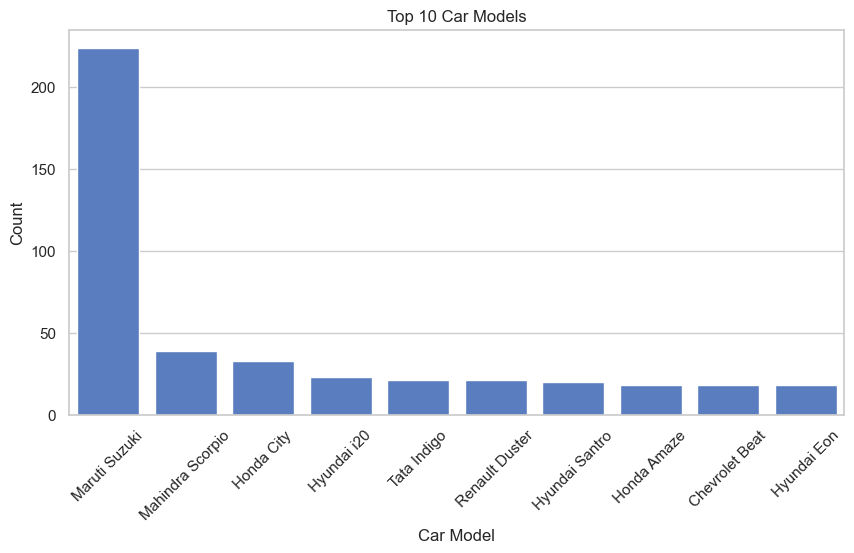

In [37]:
sns.set(style="whitegrid", palette="muted")

# 1. Top 10 Car Models
plt.figure(figsize=(10,5))
top_names = df['name'].value_counts().head(10)
sns.barplot(x=top_names.index, y=top_names.values)
plt.xticks(rotation=45)
plt.title("Top 10 Car Models")
plt.ylabel("Count")
plt.xlabel("Car Model")
plt.show()


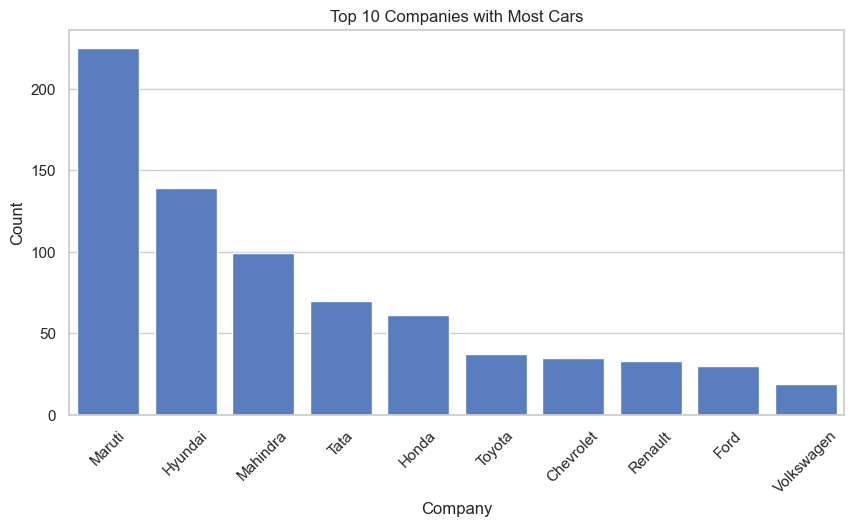

In [38]:
plt.figure(figsize=(10,5))
top_companies = df['company'].value_counts().head(10)
sns.barplot(x=top_companies.index, y=top_companies.values)
plt.xticks(rotation=45)
plt.title("Top 10 Companies with Most Cars")
plt.ylabel("Count")
plt.xlabel("Company")
plt.show()

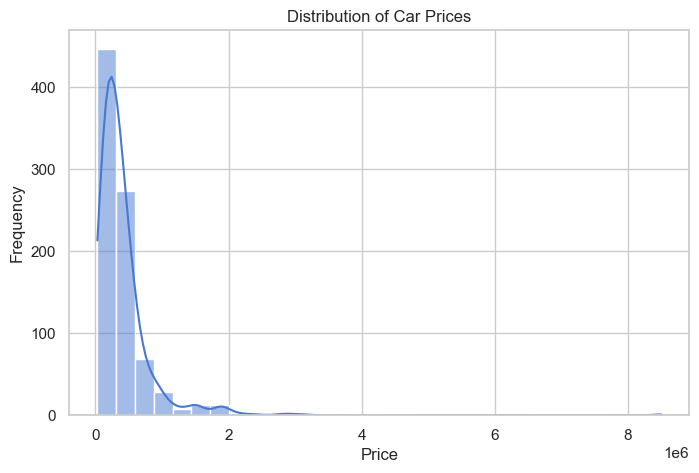

In [39]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

C:\Users\Ali Ahmad\AppData\Local\Temp\ipykernel_1664\3429745985.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


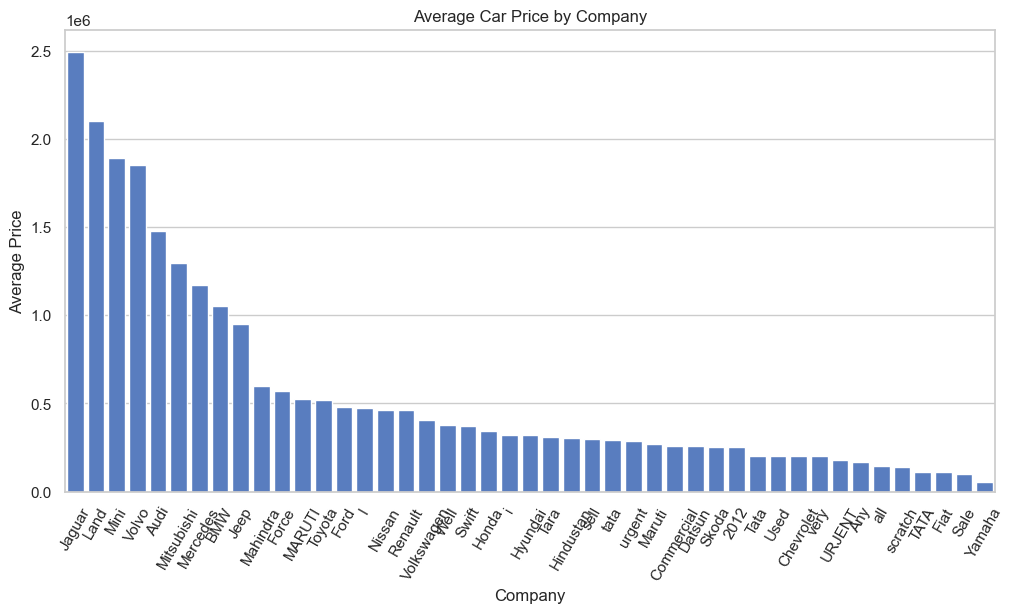

In [40]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=df,
    x="company",
    y="Price",
    estimator="mean",       # average price
    ci=None,                # remove error bars
    order=df.groupby("company")["Price"].mean().sort_values(ascending=False).index
)
plt.xticks(rotation=60)
plt.title("Average Car Price by Company")
plt.xlabel("Company")
plt.ylabel("Average Price")
plt.show()


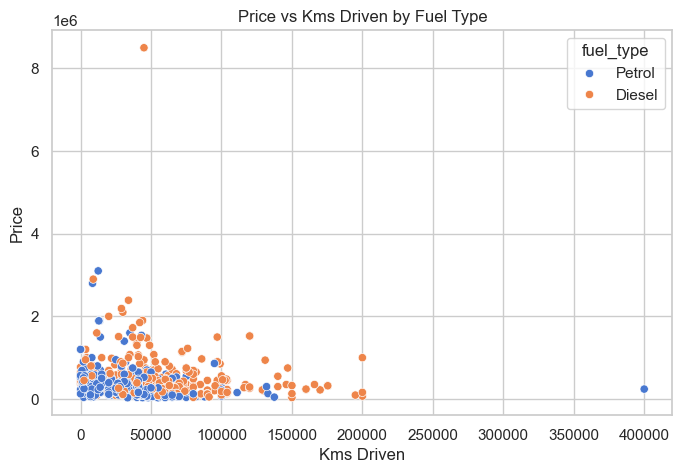

In [41]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="kms_driven", y="Price", hue="fuel_type")
plt.title("Price vs Kms Driven by Fuel Type")
plt.xlabel("Kms Driven")
plt.ylabel("Price")
plt.show()

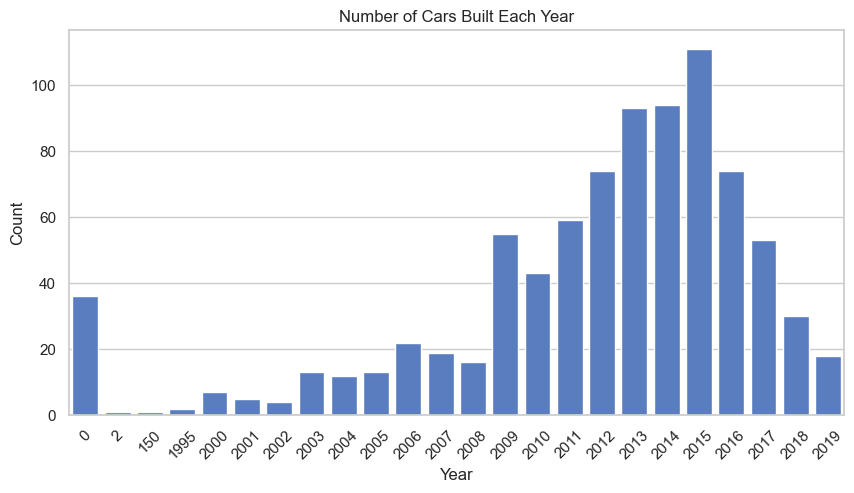

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="year", order=sorted(df["year"].unique()))
plt.xticks(rotation=45)
plt.title("Number of Cars Built Each Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

In [43]:
df = df[df['year'] > 1995]

## 7. Remove Outliers

In [44]:
df = df[df['kms_driven'] < 200000]

In [45]:
df[df['kms_driven'] > 140000]

,name,company,year,Price,kms_driven,fuel_type
183,Tata Indigo,Tata,2016,320000.0,175430.0,Diesel
237,Tata Indigo,Tata,2016,320000.0,175430.0,Diesel
238,Tata Indigo,Tata,2016,320000.0,175400.0,Diesel
283,Tata Indigo,Tata,2016,320000.0,175430.0,Diesel
303,Mahindra Scorpio,Mahindra,2004,230000.0,160000.0,Diesel
313,Mahindra Scorpio,Mahindra,2007,220000.0,170000.0,Diesel
379,Maruti Suzuki,Maruti,2016,350000.0,166000.0,Diesel
443,Honda Amaze,Honda,2016,240000.0,160000.0,Diesel
553,Tata Indica,Tata,2005,35000.0,150000.0,Diesel
589,Tata Indigo,Tata,2014,95000.0,195000.0,Diesel


In [46]:
df = df[df['Price'] <8000000]

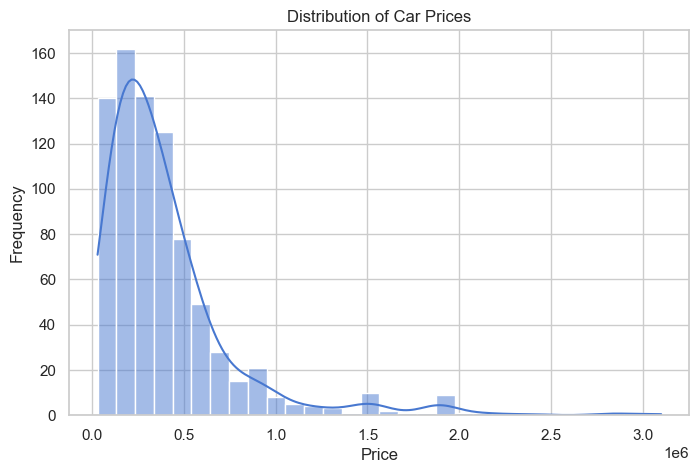

In [47]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [48]:
df.describe()

,year,Price,kms_driven
count,810.000000,8.100000e+02,810.000000
mean,2012.502469,4.017489e+05,45063.992593
std,3.898986,3.815043e+05,30413.281446
min,2000.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,26625.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.899998e+05,56000.000000
max,2019.000000,3.100000e+06,195000.000000


In [49]:
df.shape

(810, 6)

In [50]:
df[df['kms_driven'] == 0.0]

,name,company,year,Price,kms_driven,fuel_type
220,Mahindra Jeep,Mahindra,2019,379000.0,0.0,Diesel
376,Mahindra Jeep,Mahindra,2019,379000.0,0.0,Diesel
387,Toyota Innova,Toyota,2012,770000.0,0.0,Diesel
702,Ford Figo,Ford,2019,525000.0,0.0,Petrol
721,Maruti Suzuki,Maruti,2009,125000.0,0.0,Petrol
738,Hyundai Creta,Hyundai,2019,1200000.0,0.0,Petrol
762,Tata Tiago,Tata,2019,568500.0,0.0,Petrol


In [51]:
df[df['Price'] > 2000000]

,name,company,year,Price,kms_driven,fuel_type
232,Land Rover,Land,2015,2100000.0,30000.0,Diesel
510,Jaguar XE,Jaguar,2016,2800000.0,8500.0,Petrol
667,Jaguar XF,Jaguar,2013,2190000.0,29000.0,Diesel
668,Audi Q5,Audi,2014,2390000.0,34000.0,Diesel
719,Audi A3,Audi,2015,3100000.0,12516.0,Petrol
838,Ford Endeavor,Ford,2019,2900000.0,9000.0,Diesel


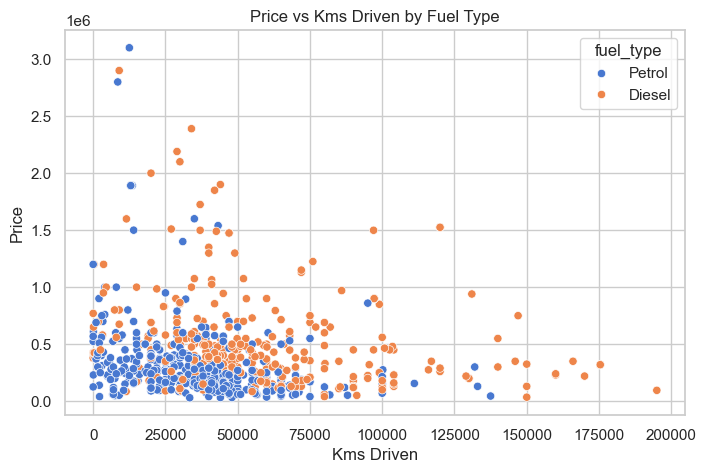

In [52]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="kms_driven", y="Price", hue="fuel_type")
plt.title("Price vs Kms Driven by Fuel Type")
plt.xlabel("Kms Driven")
plt.ylabel("Price")
plt.show()

In [1]:
import pandas as pd
df = pd.read_csv("data/Cleaned_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  803 non-null    int64  
 1   name        803 non-null    object 
 2   company     803 non-null    object 
 3   year        803 non-null    int64  
 4   Price       803 non-null    float64
 5   kms_driven  803 non-null    float64
 6   fuel_type   803 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 44.0+ KB


In [6]:
df[df['name'] == 'Fiat Linea']

,Unnamed: 0,name,company,year,Price,kms_driven,fuel_type
710,772,Fiat Linea,Fiat,2009,120000.0,64000.0,Petrol


In [53]:
df[df['kms_driven'] < 1000]

,name,company,year,Price,kms_driven,fuel_type
1,Mahindra Jeep,Mahindra,2006,425000.0,40.0,Diesel
15,Mahindra Jeep,Mahindra,2006,425000.0,40.0,Diesel
215,Mahindra Jeep,Mahindra,2019,390000.0,60.0,Diesel
220,Mahindra Jeep,Mahindra,2019,379000.0,0.0,Diesel
222,Mahindra Jeep,Mahindra,2018,385000.0,588.0,Diesel
302,Maruti Suzuki,Maruti,2019,610000.0,73.0,Petrol
364,Mahindra Jeep,Mahindra,2019,390000.0,60.0,Diesel
376,Mahindra Jeep,Mahindra,2019,379000.0,0.0,Diesel
381,Mahindra Jeep,Mahindra,2018,385000.0,588.0,Diesel
382,Mahindra Jeep,Mahindra,2006,425000.0,122.0,Diesel


In [54]:
df.shape

(810, 6)

In [55]:
df = df[df['kms_driven'] > 0.0]

In [56]:
df.shape

(803, 6)

In [57]:
df[df['Price'] < 40000]

,name,company,year,Price,kms_driven,fuel_type
454,Tata Nano,Tata,2010,32000.0,44005.0,Petrol
553,Tata Indica,Tata,2005,35000.0,150000.0,Diesel
598,Tata Nano,Tata,2010,32000.0,48008.0,Petrol
834,Maruti Suzuki,Maruti,2000,35999.0,60000.0,Petrol
839,Tata Indica,Tata,2005,39999.0,80000.0,Diesel
851,Maruti Suzuki,Maruti,2000,30000.0,33400.0,Petrol


In [58]:
df['age'] = 2025 - df['year']

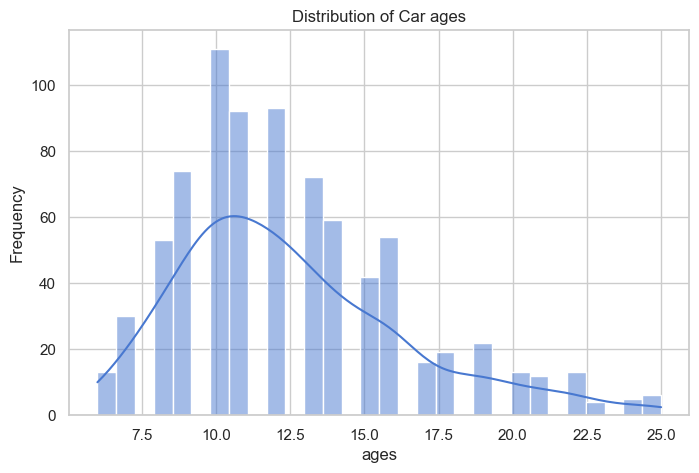

In [59]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Distribution of Car ages")
plt.xlabel("ages")
plt.ylabel("Frequency")
plt.show()

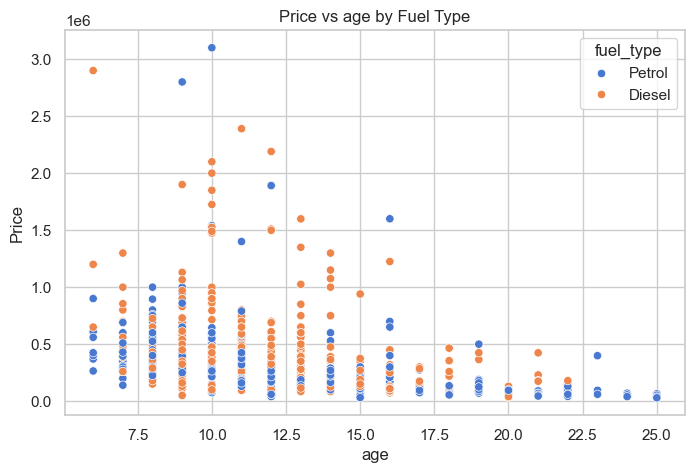

In [60]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="age", y="Price", hue="fuel_type")
plt.title("Price vs age by Fuel Type")
plt.xlabel("age")
plt.ylabel("Price")
plt.show()

In [61]:
df[['age','kms_driven','Price']].corr()

,age,kms_driven,Price
age,1.000000,0.234841,-0.353926
kms_driven,0.234841,1.000000,-0.155900
Price,-0.353926,-0.155900,1.000000


In [62]:
df.isna().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
age           0
dtype: int64

## Encoding and Scaling Data

In [63]:
ohe = OneHotEncoder(sparse_output=False,handle_unknown="ignore", drop="first")  # drop first to avoid dummy trap
encoded = ohe.fit_transform(df[["name", "company"]])

In [64]:
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(["name", "company"]))

In [66]:
le = LabelEncoder()
df['fuel_type_encded'] = le.fit_transform(df["fuel_type"])

In [67]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[["kms_driven", "age"]])

In [68]:
scaled_df = pd.DataFrame(scaled, columns=["kms_driven_scaled", "age_scaled"])

In [69]:
df = df.reset_index(drop=True)
encoded_df = encoded_df.reset_index(drop=True)
scaled_df = scaled_df.reset_index(drop=True)


In [70]:
import joblib
joblib.dump(le,'le.joblib')

['le.joblib']

In [71]:
df_encoded = pd.concat(
    [df.drop(columns=["name", "company", "fuel_type","kms_driven","year","age"]), encoded_df, scaled_df],
    axis=1
)

In [72]:
df_encoded.head()

,Price,fuel_type_encded,name_Audi A4,name_Audi A6,name_Audi A8,name_Audi Q3,name_Audi Q5,name_Audi Q7,name_BMW 3,name_BMW 5,...,company_Mitsubishi,company_Nissan,company_Renault,company_Skoda,company_Tata,company_Toyota,company_Volkswagen,company_Volvo,kms_driven_scaled,age_scaled
0,80000.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.230611,0.631579
1,425000.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.684211
2,325000.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.143414,0.263158
3,575000.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.184448,0.263158
4,175000.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.210094,0.368421


In [73]:
X_encoded = df_encoded.drop(columns = ['Price'])

In [74]:
y = df['Price']

In [75]:
X_train_encoded,X_test_encoded,y_train,y_test = train_test_split(X_encoded,y,test_size =0.2,random_state = 661)

### Linear Regression

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
lr = LinearRegression()

In [78]:
scores = []
for i in range(1,1000):
    X_train_encoded,X_test_encoded,y_train,y_test = train_test_split(X_encoded,y,test_size =0.2,random_state = i)
    lr.fit(X_train_encoded,y_train)
    scores.append(r2_score(y_test,lr.predict(X_test_encoded)))

In [79]:
np.argmax(scores)

np.int64(103)

In [80]:
scores

[0.587692479121887,
 0.33748045611598376,
 0.5125098223245387,
 0.5475675441373954,
 -0.17269317531837824,
 0.28148698201706746,
 0.5358804796544937,
 0.7119927373498387,
 0.4438037145295213,
 -0.0002446095437727003,
 0.5633349438404165,
 0.012879882875419413,
 0.42412008210405383,
 0.125070927268635,
 0.6513202888528047,
 0.5236250739665247,
 0.014697545078653729,
 0.5316477616796571,
 0.29352772744567757,
 0.08663404507125361,
 0.8022590790974917,
 0.5645923693862156,
 0.5420975146375,
 0.7597841004350977,
 0.026573693881130067,
 0.20648577294963677,
 -0.06791740142685532,
 0.45504970566022784,
 0.6618496983351279,
 0.6768725542327771,
 0.7457850787105058,
 0.7182297234330284,
 0.5150270680345597,
 0.5096024227007758,
 0.4767878083082673,
 0.23188887174656547,
 0.5773280282230266,
 0.6392703779395201,
 0.8438808732287479,
 -0.471172585676215,
 0.6336633554114932,
 0.6572167524094998,
 0.21022613872566176,
 0.464423643800295,
 0.4366913721463199,
 0.5872194913595808,
 0.68093387111005

In [87]:
scores[np.argmax(scores)]

0.8690918408726308

In [82]:
X_train_encoded,X_test_encoded,y_train,y_test = train_test_split(X_encoded,y,test_size =0.2,random_state = 104)
lr.fit(X_train_encoded,y_train)
print(r2_score(y_test,lr.predict(X_test_encoded)))
print(np.sqrt(mean_squared_error(y_test,lr.predict(X_test_encoded))))

0.8690918408726308
142696.94548112625


In [88]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

### Other Models

Linear Regression : 87 %


d:\AI_ML_Projects\MLOps-project\myenv\lib\site-packages\joblib\externals\loky\backend\context.py:131: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\AI_ML_Projects\MLOps-project\myenv\lib\site-packages\joblib\externals\loky\backend\context.py", line 247, in _count_physical_cores
    cpu_count_physical = _count_physical_cores_win32()
  File "d:\AI_ML_Projects\MLOps-project\myenv\lib\site-packages\joblib\externals\loky\backend\context.py", line 299, in _count_physical_cores_win32
    cpu_info = subprocess.run(
  File "C:\Users\Ali Ahmad\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\Ali Ahmad\AppData\Local\Programs\Python\Python310\l

K Nearest Neighbours : 64 %
Decision Tree : 31 %
Random Forest : 64 %
AdaBoost : 24 %
Gradient Boosting Regressor : 61 %


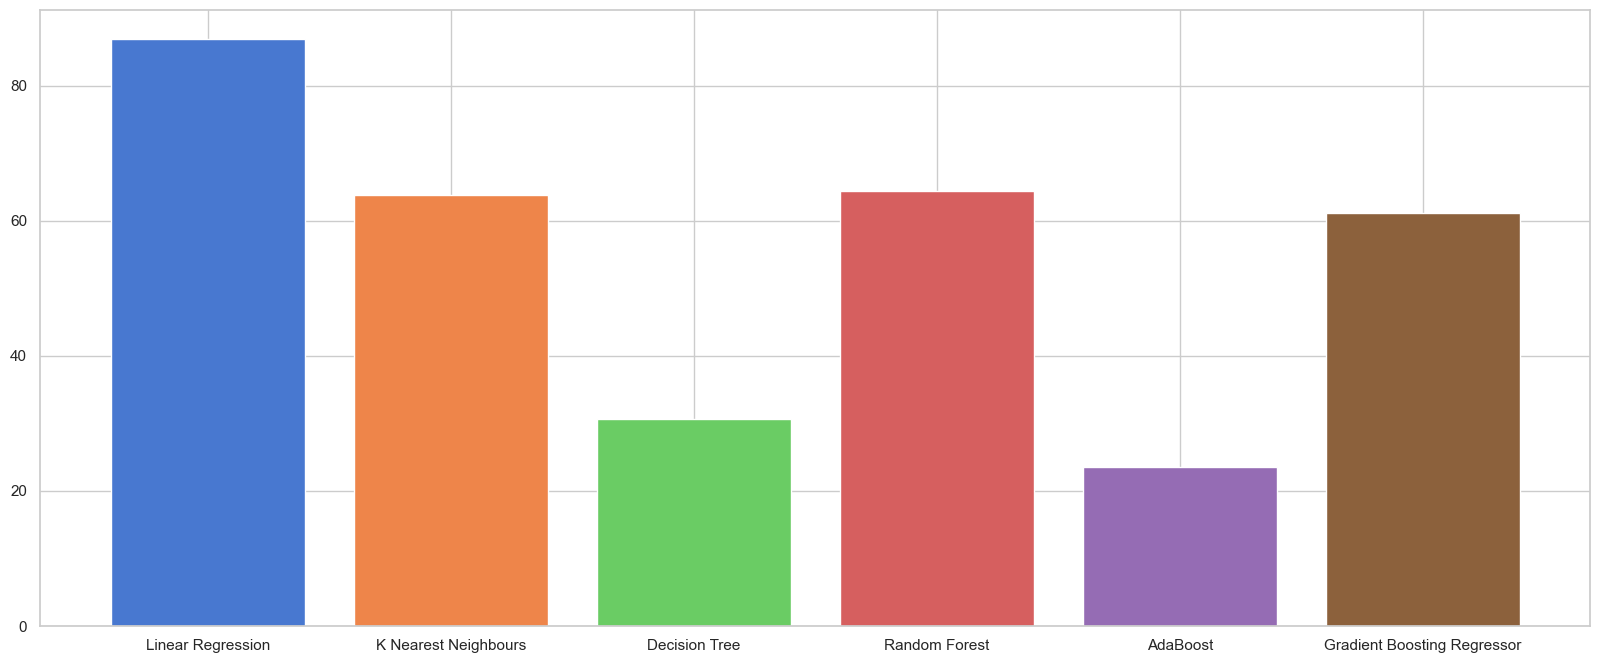

In [89]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor



lr  = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=8)
dt  = DecisionTreeRegressor(max_depth = 5)
rf  = RandomForestRegressor(n_estimators=100, max_features= 7)
ada = AdaBoostRegressor( n_estimators=150, learning_rate =.08)
gbr = GradientBoostingRegressor(max_depth=7, n_estimators=500, learning_rate =.05)

regressors = [('Linear Regression', lr), ('K Nearest Neighbours', knn),('Decision Tree', dt), ('Random Forest', rf), 
              ('AdaBoost', ada),('Gradient Boosting Regressor', gbr)]

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

for regressor_name, regressor in regressors:

    regressor.fit(X_train_encoded, y_train)    
  
    y_pred = regressor.predict(X_test_encoded)
    accuracy = round(r2_score(y_test,y_pred),3)*100
    
    print('{:s} : {:.0f} %'.format(regressor_name, accuracy))
    plt.rcParams["figure.figsize"] = (20,8)
    plt.bar(regressor_name,accuracy)

In [90]:
X_train_encoded,X_test_encoded,y_train,y_test = train_test_split(X_encoded,y,test_size =0.2,random_state = 42)

### XGBoost

In [92]:
from xgboost import XGBRegressor
scores = []
for i in range(1,1000):
    X_train_encoded,X_test_encoded,y_train,y_test = train_test_split(X_encoded,y,test_size =0.2,random_state = i)
    model = XGBRegressor()
    model.fit(X_train_encoded,y_train)
    pred = model.predict(X_test_encoded)
    scores.append(r2_score(y_test,pred))

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
np.argmax(scores)

In [ ]:
scores[38]

### Label Encoder Only 

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
label_encoders = {}
for col in ["name", "company", "fuel_type"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # save encoders for future use

# -------------------------------
# 2. Features & target
# -------------------------------
X = df.drop(columns=["Price"])
y = df["Price"]


scaler = StandardScaler()
X[["kms_driven", "age"]] = scaler.fit_transform(X[["kms_driven", "age"]])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost":XGBRegressor()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    cv_scores = cross_val_score(model, X, y, cv=5, scoring="r2")
    
    print(f"\n📌 {model_name}")
    print(f"R²: {r2:.3f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"Cross-val R² mean: {cv_scores.mean():.3f}")

In [80]:
X_train_encoded,X_test_encoded,y_train,y_test = train_test_split(X_encoded,y,test_size =0.2,random_state =39)
model = XGBRegressor()
model.fit(X_train_encoded,y_train)
pred = model.predict(X_test_encoded)
print(r2_score(y_test,pred))

0.9123471029227406


In [81]:
print(np.sqrt(mean_squared_error(y_test,model.predict(X_test_encoded))))

100461.67313871867


In [82]:
import joblib
joblib.dump(model,'model.joblib')

['model.joblib']

In [83]:
joblib.dump(scaler,'scaler.joblib')
joblib.dump(ohe,'ohe.joblib')

['ohe.joblib']

In [84]:
df[df['company'] == 'Hyundai']['name'].value_counts()

name
Hyundai i20        23
Hyundai Santro     20
Hyundai Eon        18
Hyundai Grand      15
Hyundai Elite      15
Hyundai Verna      15
Hyundai i10        11
Hyundai Getz        5
Hyundai Creta       4
Hyundai Accent      4
Hyundai Fluidic     3
Hyundai Elantra     2
Hyundai Xcent       2
Hyundai Sonata      1
Name: count, dtype: int64

In [85]:
df.shape

(803, 8)

In [86]:
df.head()

,name,company,year,Price,kms_driven,fuel_type,age,fuel_type_encded
0,Hyundai Santro,Hyundai,2007,80000.0,45000.0,Petrol,18,1
1,Mahindra Jeep,Mahindra,2006,425000.0,40.0,Diesel,19,0
2,Hyundai Grand,Hyundai,2014,325000.0,28000.0,Petrol,11,1
3,Ford EcoSport,Ford,2014,575000.0,36000.0,Diesel,11,0
4,Ford Figo,Ford,2012,175000.0,41000.0,Diesel,13,0
